# Boarder Detection and Cropping
To crop the image **before** the resizing.

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter

gray.shape is (552, 800)
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
thresh_gray.shape (552, 800)
x is 126
y is 34
w is 544
h is 488
crop.shape is (488, 544)


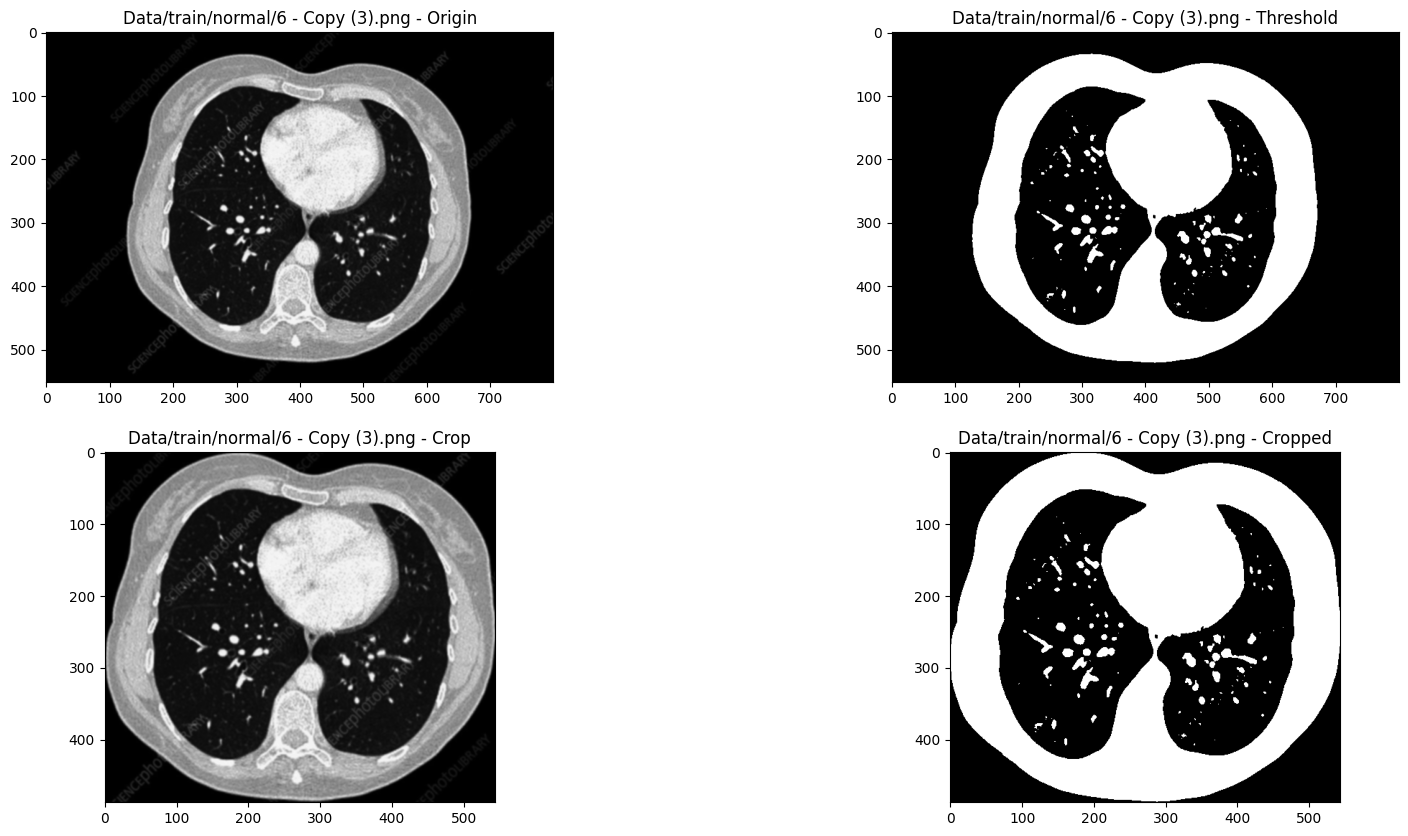

In [21]:
n_path = 'Data/train/normal/6 - Copy (3).png'
a_path = 'Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000061.png'
l_path = 'Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa/000002.png'
s_path = 'Data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000003.png'

def detect_boarder(image_path):
    # load image
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
    gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) 

    kernel_size = 5
    sigma = 1.0
    kernel = cv2.getGaussianKernel(kernel_size, sigma)
    kernel = np.outer(kernel, kernel.transpose())

    # Apply the Gaussian filter
    gray = cv2.filter2D(gray, -1, kernel)
    
    print('gray.shape is', gray.shape)
    print(gray[50:60, 50:60])
    ax[0,0].imshow(gray, cmap='gray', vmin=0, vmax=255)
    ax[0,0].title.set_text(image_path + ' - Origin')
    # gray = cv2.resize(img, None, fx=0.25, fy=0.25) # resize since image is huge
    # gray = cv2.cvtColor(rsz_img, cv2.COLOR_BGR2GRAY) # convert to grayscale

    # threshold to get just the signature
    retval, thresh_gray = cv2.threshold(gray, thresh=50, maxval=255, type=cv2.THRESH_BINARY)
    ax[0,1].imshow(thresh_gray, cmap='gray', vmin=0, vmax=255)
    ax[0,1].title.set_text(image_path + ' - Threshold')
    print(thresh_gray[50:60, 40:50])
    print('thresh_gray.shape', thresh_gray.shape)
    # find where the signature is and make a cropped region
    points = np.argwhere(thresh_gray!=0) # find where the black pixels are
    points = np.fliplr(points) # store them in x,y coordinates instead of row,col indices
    x, y, w, h = cv2.boundingRect(points) # create a rectangle around those points
#     x, y, w, h = x-10, y-10, w+20, h+20 # make the box a little bigger
    print('x is',x)
    print('y is',y)
    print('w is', w)
    print('h is', h)
    crop = gray[y:y+h, x:x+w] # create a cropped region of the gray image
    print('crop.shape is', crop.shape)
    ax[1,0].imshow(crop, cmap='gray', vmin=0, vmax=255)
    ax[1,0].title.set_text(image_path + ' - Crop')
    # get the thresholded crop
    retval, thresh_crop = cv2.threshold(crop, thresh=50, maxval=255, type=cv2.THRESH_BINARY)
    
    ax[1,1].imshow(thresh_crop, cmap='gray', vmin=0, vmax=255)
    ax[1,1].title.set_text(image_path + ' - Cropped')
    
    # display
    # cv2.imshow("Cropped and thresholded image", thresh_crop) 
    # cv2.waitKey(0)

detect_boarder(n_path)